In [9]:
import glob # para mexer com vários arquivos varrendo todos com mesma extensão e transformando num grande data set
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt # mais usadas essa e a de baixo
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
matplotlib.style.use('default')
plt.rcParams['figure.figsize'] = [6, 4]

#Pandas Settings
pd.options.display.float_format = '{:,.2f}'.format

## Fazendo loop nos arquivos da pasta



In [10]:
# lista com o caminho + nome dos arquivos .csv (apenas caminho + nome.csv). não tem nenhuma informação extra

file_list = [f for f in glob.glob("*.csv")]

In [11]:
# obs: o "encoding = 'unicode_escape'" é usado para não dá erro que daria em alguns casos qnd 
# se lê como dataframe e há algum problema de codificação, então isso evita o erro

df = pd.read_csv(file_list[21],encoding = 'unicode_escape') # df é um dataframe apenas para o arquivo arquivo 21 do file_list
display(df.shape) # mostra as linhas e colunas. Se usasse num for podia mostrar linhas e colunas de cada arquivo
df.head()

(272, 58)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA
0,T1,07/08/09,Buyuksehyr,Besiktas,1,1,D,1.00,1.00,D,...,2.20,2.00,1.80,1.75,11,0.50,2.12,2.07,1.83,1.82
1,T1,08/08/09,Diyarbakirspor,Ankaragucu,2,2,D,1.00,2.00,A,...,2.33,2.14,1.70,1.64,13,0.00,1.85,1.79,2.11,1.98
2,T1,08/08/09,Sivasspor,Trabzonspor,1,2,A,0.00,1.00,A,...,2.22,2.07,1.75,1.68,13,0.00,2.05,1.94,1.89,1.83
3,T1,09/08/09,Bursaspor,Kasimpasa,2,1,H,0.00,0.00,D,...,2.12,2.03,1.82,1.73,12,-1.00,1.81,1.78,2.15,2.11
4,T1,09/08/09,Denizlispor,Fenerbahce,0,2,A,0.00,1.00,A,...,1.91,1.82,2.01,1.92,13,0.50,2.08,2.04,1.88,1.84


In [12]:
# criando um dataframe para todos os arquivos do file_list e não apenas para um como feito anteriormente

df_list = [pd.read_csv(f,encoding = 'unicode_escape') for f in file_list]

In [13]:
df_list[0].columns # aprensenta as colunas do dataframe 0

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HFKC', 'AFKC', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA',
       'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH',
       'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD',
       'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA',
       'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

## Gerando o dadaset final

In [14]:
for i in range(len(df_list)):
    
    # vai percorrer o dataframe e o if verifica se tem a coluna "Home" em df_list, se tiver (por conhecer o arquivo) 
    # se sabe que este df_list (nesta posição) tem uma nomenclatura diferente que pode atrapalhar na análise
    # dos dados, então padronizamos a nomenclatura, substituindo "Home" por "HomeTeam", "Away" por "AwayTeam"
    # "Res" por "FTR", ... e "AvgA" por "B365A" como está abaixo
    if 'Home' in list(df_list[i].columns):
        df_list[i] = df_list[i].rename(columns={'Home':'HomeTeam', 'Away':'AwayTeam', 'Res':'FTR',
                                              'AvgH':'B365H', 'AvgD':'B365D', 'AvgA':'B365A'})

In [15]:
# pegando as colunas que vc precisa em um momento
columns = ['HomeTeam','AwayTeam','FTR','B365H','B365D','B365A','Div']
new_df_list = []
for i in range(len(df_list)):
    new_df_list.append(df_list[i][columns])

In [16]:
final_dataset = pd.concat(new_df_list, sort=False).reset_index(drop=True) # o reset_index é para remover a coluna de índice
final_dataset.shape

(33248, 7)

In [17]:
display(final_dataset.head())

,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,Div
0,Asteras Tripolis,Giannina,A,1.70,3.40,5.50,G1
1,Olympiakos,Larisa,H,1.17,7.00,15.00,G1
2,Xanthi,Lamia,D,1.67,3.30,6.00,G1
3,AEK,Panetolikos,H,1.36,4.50,9.00,G1
4,Kerkyra,Panionios,A,3.75,3.10,2.10,G1


In [18]:
display(final_dataset.tail())

,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,Div
33243,Gent,Mechelen,H,1.53,4.33,4.75,B1
33244,Kortrijk,Mouscron,A,2.75,3.40,2.30,B1
33245,Lokeren,Charleroi,D,3.60,3.30,1.95,B1
33246,Standard,Oostende,D,1.95,3.40,3.50,B1
33247,Westerlo,Genk,A,2.90,3.30,2.25,B1


In [19]:
final_dataset.info() # podemos ver que temos informações nulas
# pois no total temos colunas (que aqui estão em forma de linha) que não chega no total de índice que é
# 33248

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33248 entries, 0 to 33247
Data columns (total 7 columns):
HomeTeam    33160 non-null object
AwayTeam    33160 non-null object
FTR         33158 non-null object
B365H       33079 non-null float64
B365D       33079 non-null float64
B365A       33079 non-null float64
Div         33160 non-null object
dtypes: float64(3), object(4)
memory usage: 1.3+ MB


In [20]:
# aqui removemos as colunas nulas (dropna)

final_dataset.dropna(inplace=True) 
final_dataset.shape

(33078, 7)

In [21]:
# resetando o índice de novo já que dropou para ir de 0 até o final
# sem ficar pulando nenhum valor

final_dataset = final_dataset.reset_index(drop=True)

In [22]:
final_dataset.info()

# agora podemos perceber que o total de índice é 33078 e todas as colunas do datasetfinal (HomeTeam, ..., Div)
# tem também 33078 no total

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33078 entries, 0 to 33077
Data columns (total 7 columns):
HomeTeam    33078 non-null object
AwayTeam    33078 non-null object
FTR         33078 non-null object
B365H       33078 non-null float64
B365D       33078 non-null float64
B365A       33078 non-null float64
Div         33078 non-null object
dtypes: float64(3), object(4)
memory usage: 1.3+ MB


## Evolução de banca através de gráfico de linha

In [23]:
def resultado_aposta(df):
    if df['FTR'] == 'H':
        return 'ganha'
    else:
        return 'perdida'

In [24]:
# bet_dataset vai ter odds filtradas até 1.25

bet_dataset = final_dataset[final_dataset['B365H'] <= 1.25].reset_index(drop=True)

In [25]:
# vamos dropar as odds do empate e do visitante pq só queremos as do mandante pra esse caso

bet_dataset.drop(['B365D', 'B365A'], axis=1, inplace=True)
bet_dataset['resultado_aposta'] = bet_dataset.apply(resultado_aposta, axis=1)

In [26]:
bet_dataset

,HomeTeam,AwayTeam,FTR,B365H,Div,resultado_aposta
0,Olympiakos,Larisa,H,1.17,G1,ganha
1,Panathinaikos,Levadeiakos,D,1.17,G1,perdida
2,PAOK,Kerkyra,H,1.07,G1,ganha
3,AEK,Larisa,H,1.20,G1,ganha
4,Olympiakos,Asteras Tripolis,D,1.22,G1,perdida
5,PAOK,Panetolikos,H,1.17,G1,ganha
6,Panathinaikos,Apollon,H,1.25,G1,ganha
7,PAOK,Giannina,H,1.25,G1,ganha
8,PAOK,Lamia,H,1.14,G1,ganha
9,Panathinaikos,Larisa,H,1.22,G1,ganha


In [27]:
# simulando uma banca

banca = 1000
bet_dataset['banca_atualizada'] = ''
for key,row in bet_dataset.iterrows():
    stake = banca * 0.01
    if row['FTR'] == 'H':
        banca += stake * (row['B365H'] - 1)
        bet_dataset.loc[key, 'banca_atualizada'] = round(banca,2)
    else:
        banca -= stake
        bet_dataset.loc[key, 'banca_atualizada'] = round(banca,2)

In [28]:
bet_dataset.head()

,HomeTeam,AwayTeam,FTR,B365H,Div,resultado_aposta,banca_atualizada
0,Olympiakos,Larisa,H,1.17,G1,ganha,"1,001.70"
1,Panathinaikos,Levadeiakos,D,1.17,G1,perdida,991.68
2,PAOK,Kerkyra,H,1.07,G1,ganha,992.38
3,AEK,Larisa,H,1.20,G1,ganha,994.36
4,Olympiakos,Asteras Tripolis,D,1.22,G1,perdida,984.42


In [29]:
bet_dataset_plot = bet_dataset

In [30]:
bet_dataset_plot # mesma coisa que antes, apenas colocamos outro nome para o dataset que vai plotar

,HomeTeam,AwayTeam,FTR,B365H,Div,resultado_aposta,banca_atualizada
0,Olympiakos,Larisa,H,1.17,G1,ganha,"1,001.70"
1,Panathinaikos,Levadeiakos,D,1.17,G1,perdida,991.68
2,PAOK,Kerkyra,H,1.07,G1,ganha,992.38
3,AEK,Larisa,H,1.20,G1,ganha,994.36
4,Olympiakos,Asteras Tripolis,D,1.22,G1,perdida,984.42
5,PAOK,Panetolikos,H,1.17,G1,ganha,986.09
6,Panathinaikos,Apollon,H,1.25,G1,ganha,988.56
7,PAOK,Giannina,H,1.25,G1,ganha,991.03
8,PAOK,Lamia,H,1.14,G1,ganha,992.42
9,Panathinaikos,Larisa,H,1.22,G1,ganha,994.60


In [31]:
# as vezes tem algum valor que não é float qnd vc quer trabalhar com float
# então nesse caso se usa conversão para todos os valores da coluna como segue
# e assim garantimos que todos sejam floats, e se já eram não tem problema, continuam sendo

bet_dataset_plot['banca_atualizada'] = bet_dataset_plot['banca_atualizada'].astype(float)

## Plotando a evolução da banca usando matplotlib

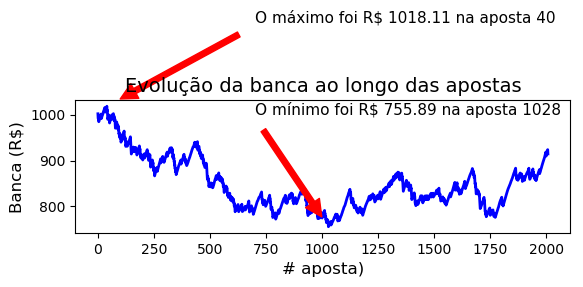

In [32]:
# Calcular e plotar o máximo e/ou mínimo do gráfico é opcional

# para calcular o mínimo do gráfico
y = bet_dataset_plot['banca_atualizada'].values.min()
x = np.where(bet_dataset_plot['banca_atualizada'].values == y)[0][0]

# para plotar informações referentes ao mínimo do gráfico
plt.title('Evolução da banca ao longo das apostas', fontsize=14, color='black')
plt.annotate(f'O mínimo foi R$ {y} na aposta {x}', xy=(x,y), xytext=(700, 1000),
            arrowprops={'color':'red', 'facecolor':'red', 'shrink':0.09}, fontsize=11)

# para calcular o máximo do gráfico
maximo = bet_dataset_plot['banca_atualizada'].values.max()
x2 = np.where(bet_dataset_plot['banca_atualizada'].values == maximo)[0][0]

# para informações referentes ao máximo do gráfico
plt.annotate(f'O máximo foi R$ {maximo} na aposta {x2}', xy=(x2,maximo), xytext=(700, 1200),
            arrowprops={'color':'red', 'facecolor':'red', 'shrink':0.09}, fontsize=11)

plt.plot(bet_dataset_plot['banca_atualizada'].values, color='blue', linewidth=2.0)
plt.ylabel('Banca (R$)', fontsize=12, color='black')
plt.xlabel('# aposta)', fontsize=12, color='black')

plt.tight_layout()
plt.savefig('banca_evol1.png')
plt.show()

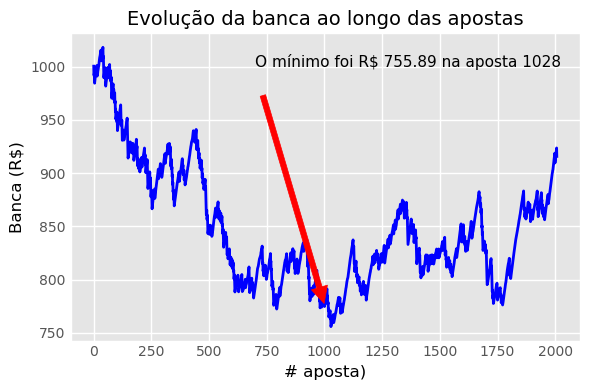

In [70]:
# plotando o gráfico e informações apenas do mínimo seguindo as aulas

# Calcular e plotar o máximo e/ou mínimo do gráfico é opcional

# para calcular o mínimo do gráfico
y = bet_dataset_plot['banca_atualizada'].values.min()
x = np.where(bet_dataset_plot['banca_atualizada'].values == y)[0][0]

# para plotar informações referentes ao mínimo do gráfico
plt.title('Evolução da banca ao longo das apostas', fontsize=14, color='black')
plt.annotate(f'O mínimo foi R$ {y} na aposta {x}', xy=(x,y), xytext=(700, 1000),
           arrowprops={'color':'red', 'facecolor':'red', 'shrink':0.09}, fontsize=11)

'''# se eu quisesse o máximo do gráfico
maximo = bet_dataset_plot['banca_atualizada'].values.max()
x2 = np.where(bet_dataset_plot['banca_atualizada'].values == maximo)[0][0]

# para informações referentes ao máximo do gráfico
plt.annotate(f'O máximo foi R$ {maximo} na aposta {x2}', xy=(x2,maximo), xytext=(700, 1200),
            arrowprops={'color':'red', 'facecolor':'red', 'shrink':0.09}, fontsize=11)
'''
pass

plt.plot(bet_dataset_plot['banca_atualizada'].values, color='blue', linewidth=2.0)
plt.ylabel('Banca (R$)', fontsize=12, color='black')
plt.xlabel('# aposta)', fontsize=12, color='black')

plt.tight_layout()
plt.savefig('banca_evol.png')
plt.show()

## Plotando a evolução da banca usando o seaborn

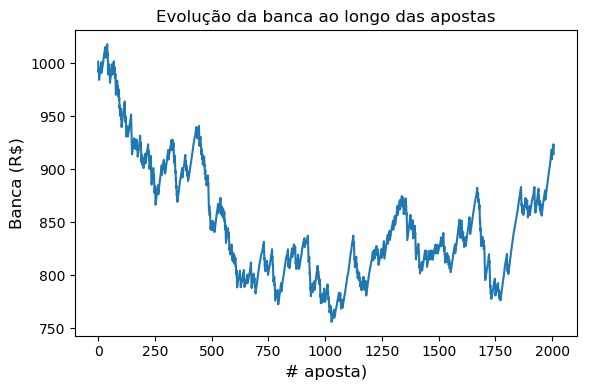

In [34]:
ax = sns.lineplot(data=bet_dataset_plot['banca_atualizada'])
ax.set_title('Evolução da banca ao longo das apostas')
ax.set_xlabel('# aposta)', fontsize=12, color='black')
ax.set_ylabel('Banca (R$)', fontsize=12, color='black')

# daqui para baixo é igual ao exemplo acima
plt.tight_layout()
plt.savefig('bar_odds_mean_padas.png')
plt.show()

## Alterando o estilo do gráfico

In [35]:
plt.style.available

['seaborn-darkgrid',
 'classic',
 'bmh',
 'seaborn',
 'seaborn-paper',
 'seaborn-whitegrid',
 'seaborn-white',
 'seaborn-colorblind',
 'seaborn-poster',
 'seaborn-dark-palette',
 '_classic_test',
 'seaborn-dark',
 'seaborn-notebook',
 'grayscale',
 'tableau-colorblind10',
 'fast',
 'seaborn-muted',
 'fivethirtyeight',
 'seaborn-bright',
 'seaborn-pastel',
 'Solarize_Light2',
 'seaborn-talk',
 'seaborn-deep',
 'dark_background',
 'seaborn-ticks',
 'ggplot']

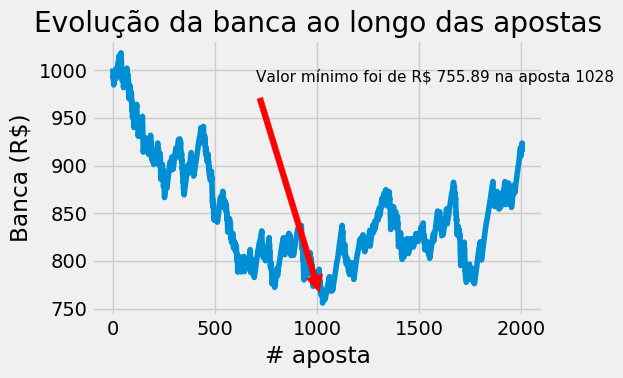

In [36]:
# colocando estilo usando o matplotlib

plt.style.use('fivethirtyeight') # aqui colocamos o estilo
y = bet_dataset_plot['banca_atualizada'].values.min()
x= np.where(bet_dataset_plot['banca_atualizada'].values == y)[0][0]
plt.plot(bet_dataset_plot['banca_atualizada'].values)
plt.ylabel('Banca (R$)')
plt.xlabel('# aposta')
plt.title('Evolução da banca ao longo das apostas')
plt.annotate(f'Valor mínimo foi de R$ {y} na aposta {x}', xy=(x, y), xytext=(700, 988),
            arrowprops={'color':'red', 'facecolor':'red', 'shrink':0.05}, fontsize=11)
plt.tight_layout()
plt.savefig('imagem 4.png')
plt.show()

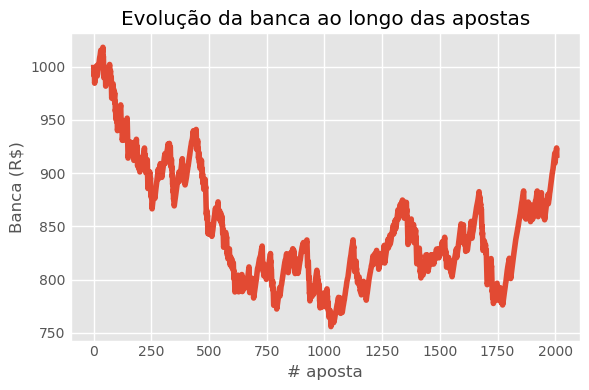

In [37]:
# colocando estilo usando o seaborn

plt.style.use('ggplot') # aqui colocamos o estilo
ax = sns.lineplot(data=bet_dataset_plot['banca_atualizada'])

#ax.set(xlabel='# aposta', ylabel='Banca (R$)', title='Evolução da banca ao longo das apostas')

# a linha comentada acima faz a mesma coisa que essas três linhas juntas abaixo
ax.set_title('Evolução da banca ao longo das apostas')
ax.set_xlabel('# aposta')
ax.set_ylabel('Banca (R$)')

plt.tight_layout()
# opcional
plt.savefig('imagem 5.png')
plt.show()

## Gŕafico de barras

In [38]:
# só para saber o tamanho de nossa lista de dataframes
print(len(df_list))

102


In [39]:
final_dataset['Div'].unique().shape # o shape conta e o unique() é para ser único, contar sem repetir

(12,)

In [40]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33078 entries, 0 to 33077
Data columns (total 7 columns):
HomeTeam    33078 non-null object
AwayTeam    33078 non-null object
FTR         33078 non-null object
B365H       33078 non-null float64
B365D       33078 non-null float64
B365A       33078 non-null float64
Div         33078 non-null object
dtypes: float64(3), object(4)
memory usage: 1.3+ MB


In [41]:
final_dataset.dropna(inplace=True) # não mudou pq eu ja tinha dropado as nulas (dropna)
final_dataset.shape

(33078, 7)

In [42]:
# aqui vamos "fazer" várias entradas só no mandante mas agora independente da odd
# por isso criamos essa coluna "Aposta" só com a aposta no mandante "H"
# só para exemplificação de como analisar uma aposta com grafico

final_dataset['Aposta'] = np.repeat(['H'], 33078)
final_dataset

,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,Div,Aposta
0,Asteras Tripolis,Giannina,A,1.70,3.40,5.50,G1,H
1,Olympiakos,Larisa,H,1.17,7.00,15.00,G1,H
2,Xanthi,Lamia,D,1.67,3.30,6.00,G1,H
3,AEK,Panetolikos,H,1.36,4.50,9.00,G1,H
4,Kerkyra,Panionios,A,3.75,3.10,2.10,G1,H
5,Levadeiakos,PAOK,D,6.00,4.00,1.53,G1,H
6,Platanias,Panathinaikos,D,4.20,3.10,2.00,G1,H
7,Atromitos,Apollon,D,1.75,3.25,5.25,G1,H
8,Lamia,Olympiakos,A,15.00,7.00,1.17,G1,H
9,Panetolikos,Atromitos,D,2.40,3.00,3.20,G1,H


## funções para cálculo do resultado e retorno no dataset

In [43]:
def retorno_odd(df):
    if df['Aposta'] == 'A':
        return df['B365A']
    elif df['Aposta'] == 'H':
        return df['B365H']
    else:
        return df['B365D']
    
def resultado_aposta(df):
    if df['Aposta'] == df['FTR']:
        return 'ganha'
    else:
        return 'perdida'
    
def calc_return(resultado,odd):
    if resultado == 'ganha':
        return (odd - 1) * 100
    else:
        return -100

In [44]:
final_dataset['odd'] = final_dataset.apply(retorno_odd, axis=1) # como "Aposta" só tem "H", só vai retornar odd do time da casa
final_dataset.drop(['B365A','B365H','B365D'], axis=1, inplace=True)

In [45]:
final_dataset['resultado_aposta'] = final_dataset.apply(resultado_aposta, axis=1)

In [46]:
# aqui como eu tenho que passar dois parâmetros do dataset, usei lambda com apply

final_dataset['retorno'] = final_dataset.apply(lambda row: calc_return(row['resultado_aposta'],row['odd']), axis=1)
final_dataset

,HomeTeam,AwayTeam,FTR,Div,Aposta,odd,resultado_aposta,retorno
0,Asteras Tripolis,Giannina,A,G1,H,1.70,perdida,-100.00
1,Olympiakos,Larisa,H,G1,H,1.17,ganha,17.00
2,Xanthi,Lamia,D,G1,H,1.67,perdida,-100.00
3,AEK,Panetolikos,H,G1,H,1.36,ganha,36.00
4,Kerkyra,Panionios,A,G1,H,3.75,perdida,-100.00
5,Levadeiakos,PAOK,D,G1,H,6.00,perdida,-100.00
6,Platanias,Panathinaikos,D,G1,H,4.20,perdida,-100.00
7,Atromitos,Apollon,D,G1,H,1.75,perdida,-100.00
8,Lamia,Olympiakos,A,G1,H,15.00,perdida,-100.00
9,Panetolikos,Atromitos,D,G1,H,2.40,perdida,-100.00


In [47]:
final_dataset.describe()

,odd,retorno
count,"33,078.00","33,078.00"
mean,2.67,-4.16
std,1.88,126.90
min,0.00,-100.00
25%,1.72,-100.00
50%,2.15,-100.00
75%,2.80,80.00
max,34.00,"1,800.00"


## Criando faixas de odds e agrupando os dados

In [48]:
bins = [1, 1.25, 1.5, 1.75, 2, 2.25, 2.50, 3, 3.5, 4, 4.5, 5, 10, 15, 20]

In [49]:
final_dataset['faixa_odd'] = pd.cut(final_dataset['odd'], bins)
final_dataset

,HomeTeam,AwayTeam,FTR,Div,Aposta,odd,resultado_aposta,retorno,faixa_odd
0,Asteras Tripolis,Giannina,A,G1,H,1.70,perdida,-100.00,"(1.5, 1.75]"
1,Olympiakos,Larisa,H,G1,H,1.17,ganha,17.00,"(1.0, 1.25]"
2,Xanthi,Lamia,D,G1,H,1.67,perdida,-100.00,"(1.5, 1.75]"
3,AEK,Panetolikos,H,G1,H,1.36,ganha,36.00,"(1.25, 1.5]"
4,Kerkyra,Panionios,A,G1,H,3.75,perdida,-100.00,"(3.5, 4.0]"
5,Levadeiakos,PAOK,D,G1,H,6.00,perdida,-100.00,"(5.0, 10.0]"
6,Platanias,Panathinaikos,D,G1,H,4.20,perdida,-100.00,"(4.0, 4.5]"
7,Atromitos,Apollon,D,G1,H,1.75,perdida,-100.00,"(1.5, 1.75]"
8,Lamia,Olympiakos,A,G1,H,15.00,perdida,-100.00,"(10.0, 15.0]"
9,Panetolikos,Atromitos,D,G1,H,2.40,perdida,-100.00,"(2.25, 2.5]"


In [50]:
final_dataset.faixa_odd

0         (1.5, 1.75]
1         (1.0, 1.25]
2         (1.5, 1.75]
3         (1.25, 1.5]
4          (3.5, 4.0]
5         (5.0, 10.0]
6          (4.0, 4.5]
7         (1.5, 1.75]
8        (10.0, 15.0]
9         (2.25, 2.5]
10        (2.25, 2.5]
11         (3.5, 4.0]
12        (1.0, 1.25]
13        (1.5, 1.75]
14        (1.0, 1.25]
15         (2.5, 3.0]
16        (1.5, 1.75]
17        (1.75, 2.0]
18        (5.0, 10.0]
19        (1.0, 1.25]
20        (5.0, 10.0]
21        (2.0, 2.25]
22        (1.5, 1.75]
23        (5.0, 10.0]
24        (2.25, 2.5]
25        (1.0, 1.25]
26        (1.0, 1.25]
27       (10.0, 15.0]
28         (2.5, 3.0]
29        (1.0, 1.25]
             ...     
33048     (1.75, 2.0]
33049     (2.0, 2.25]
33050     (1.5, 1.75]
33051     (1.5, 1.75]
33052      (3.0, 3.5]
33053     (2.0, 2.25]
33054     (1.25, 1.5]
33055     (1.5, 1.75]
33056     (2.0, 2.25]
33057     (1.75, 2.0]
33058      (3.0, 3.5]
33059     (1.5, 1.75]
33060     (1.25, 1.5]
33061     (1.5, 1.75]
33062     

In [51]:
# salvando o dataframe

final_dataset.to_csv('dados.csv', sep=';', index=False)

In [52]:
odd_mean = final_dataset[['faixa_odd','retorno']].groupby(['faixa_odd']).mean().reset_index()
odd_sum = final_dataset[['faixa_odd','retorno']].groupby(['faixa_odd']).sum().reset_index()
display(odd_mean)
display(odd_sum)

,faixa_odd,retorno
0,"(1.0, 1.25]",-0.26
1,"(1.25, 1.5]",-1.82
2,"(1.5, 1.75]",-2.04
3,"(1.75, 2.0]",-5.56
4,"(2.0, 2.25]",-5.31
5,"(2.25, 2.5]",-6.49
6,"(2.5, 3.0]",-6.13
7,"(3.0, 3.5]",-3.17
8,"(3.5, 4.0]",-10.44
9,"(4.0, 4.5]",5.09


,faixa_odd,retorno
0,"(1.0, 1.25]",-513.00
1,"(1.25, 1.5]","-5,925.00"
2,"(1.5, 1.75]","-8,438.00"
3,"(1.75, 2.0]","-25,524.00"
4,"(2.0, 2.25]","-23,057.00"
5,"(2.25, 2.5]","-25,778.00"
6,"(2.5, 3.0]","-23,149.00"
7,"(3.0, 3.5]","-6,545.00"
8,"(3.5, 4.0]","-13,170.00"
9,"(4.0, 4.5]","3,690.00"


## Plotando faixa de odds e retorno usando o Pandas

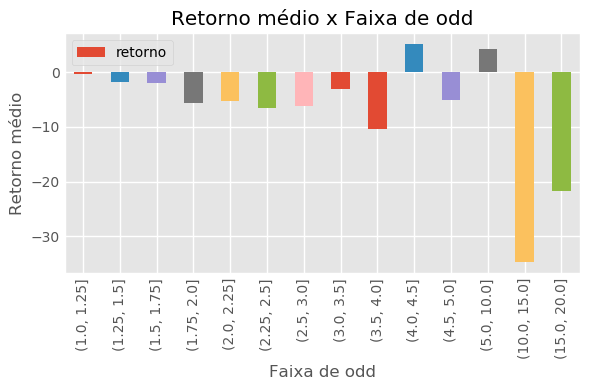

In [53]:
odd_mean.plot.bar(x = 'faixa_odd', y = 'retorno')
plt.title('Retorno médio x Faixa de odd')
plt.xlabel('Faixa de odd')
plt.ylabel('Retorno médio')
plt.tight_layout()

# opcional
plt.savefig('gráfico_barras 1.png')

plt.show()

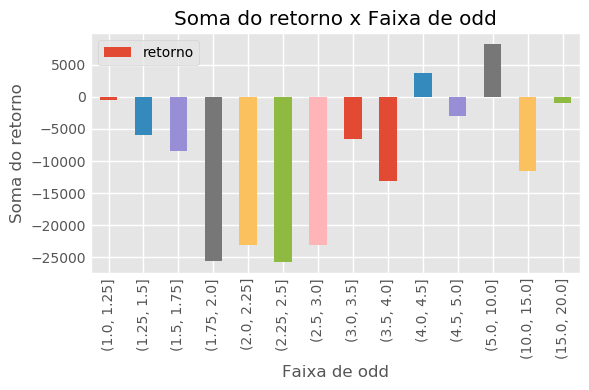

In [54]:
odd_sum.plot.bar(x = 'faixa_odd', y = 'retorno')
plt.title('Soma do retorno x Faixa de odd')
plt.xlabel('Faixa de odd')
plt.ylabel('Soma do retorno')
plt.tight_layout()

# opcional
plt.savefig('gráfico_barras 2.png')

plt.show()

## Plotando o retorno por ligas usando o pandas

In [55]:
league_mean = final_dataset[['Div','retorno']].groupby(['Div']).mean().reset_index()
league_sum = final_dataset[['Div', 'retorno']].groupby(['Div']).sum().reset_index()
display(league_mean) # poderia plotar só o head() ou o tail() como exemplo da soma abaixo
display(league_sum.head()) # poderia plotar tudo tbm como no exemplo acima

,Div,retorno
0,B1,-4.07
1,D1,-1.80
2,E0,-0.72
3,E1,-4.13
4,F1,-5.47
5,G1,-1.68
6,I1,-8.76
7,N1,-3.45
8,P1,-5.50
9,SC0,-8.26


,Div,retorno
0,B1,"-8,884.00"
1,D1,"-4,953.00"
2,E0,"-1,915.00"
3,E1,"-20,520.00"
4,F1,"-18,717.00"


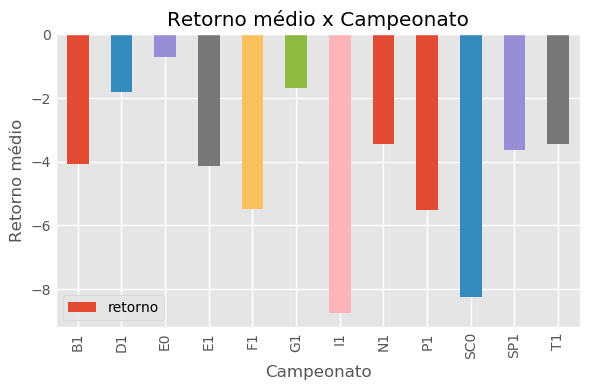

In [56]:
league_mean.plot.bar(x = 'Div', y = 'retorno')
plt.title('Retorno médio x Campeonato')
plt.xlabel('Campeonato')
plt.ylabel('Retorno médio')
plt.tight_layout()

# dessa vez não vou salvar a imagem mas se quisesse era só usar o mesmo comando dos exemplos anteriores
plt.show()

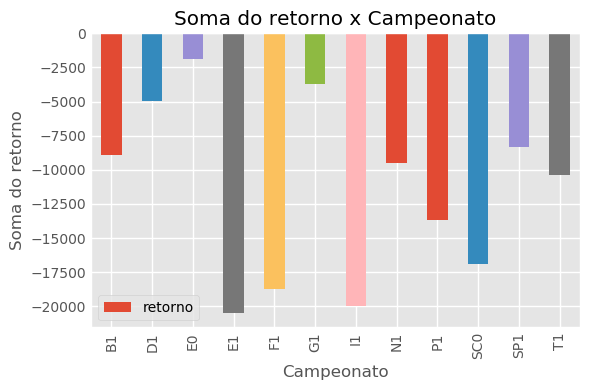

In [57]:
league_sum.plot.bar(x = 'Div', y = 'retorno')
plt.title('Soma do retorno x Campeonato')
plt.xlabel('Campeonato')
plt.ylabel('Soma do retorno')
plt.tight_layout()

# dessa vez não vou salvar a imagem mas se quisesse era só usar o mesmo comando dos exemplos anteriores
plt.show()

## Plotando usando o seaborn

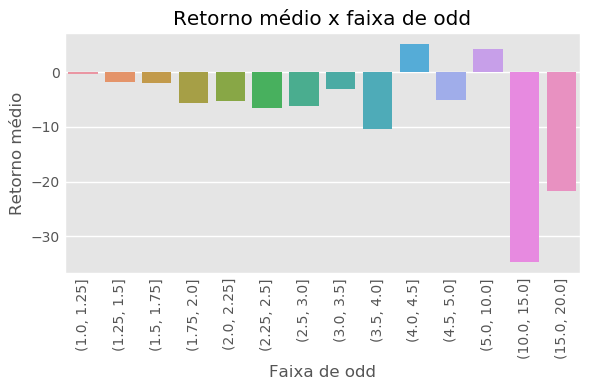

In [58]:
ax = sns.barplot(x = 'faixa_odd', y = 'retorno', data=odd_mean)
plt.xticks(rotation=90) # se não rotacionar, os valores do eixo x (por isso xticks e não yticks) ficarão em 0 grau um por cima do outro
plt.title('Retorno médio x faixa de odd') # aqui no título e nos labels usei plt ou seja, matplotlib
plt.xlabel('Faixa de odd')                # mas antes usei o seaborn (1a linha), isso mostra que são
plt.ylabel('Retorno médio')               # intercambiáveis
plt.tight_layout()

# dessa vez não vou salvar a imagem mas se quisesse era só usar o mesmo comando dos exemplos anteriores

# não precisou plt.show(). mas qualquer erro que der na hora de mostrar o gráfico, usa o plt.show()
#plt.show()

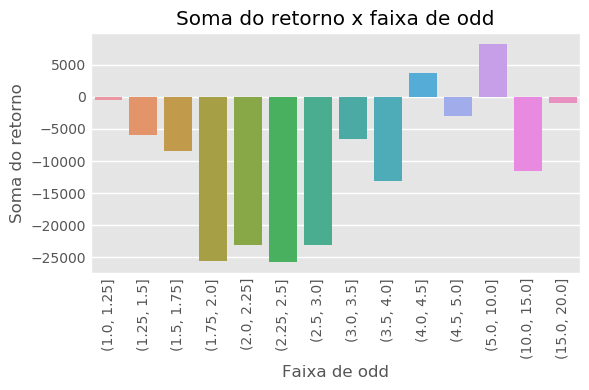

In [59]:
ax = sns.barplot(x = 'faixa_odd', y = 'retorno', data=odd_sum)
plt.xticks(rotation=90) # se não rotacionar, os valores do eixo x (por isso xticks e não yticks) ficarão em 0 grau um por cima do outro
plt.title('Soma do retorno x faixa de odd') # aqui no título e nos labels usei plt ou seja, matplotlib
plt.xlabel('Faixa de odd')                  # mas antes usei o seaborn (1a linha), isso mostra que são
plt.ylabel('Soma do retorno')               # intercambiáveis
plt.tight_layout()

# dessa vez não vou salvar a imagem mas se quisesse era só usar o mesmo comando dos exemplos anteriores

# não precisou plt.show(). mas qualquer erro que der na hora de mostrar o gráfico, usa o plt.show()
#plt.show()

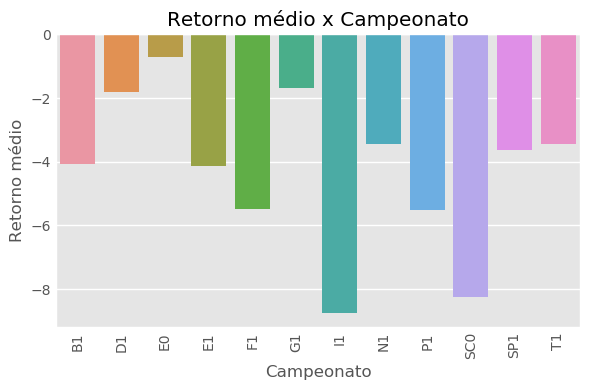

In [60]:
ax = sns.barplot(x = 'Div', y = 'retorno', data=league_mean)
plt.xticks(rotation=90) # se não rotacionar, os valores do eixo x (por isso xticks e não yticks) ficarão em 0 grau um por cima do outro
plt.title('Retorno médio x Campeonato') # aqui no título e nos labels usei plt ou seja, matplotlib
plt.xlabel('Campeonato')                # mas antes usei o seaborn (1a linha), isso mostra que são
plt.ylabel('Retorno médio')             # intercambiáveis
plt.tight_layout()

# dessa vez não vou salvar a imagem mas se quisesse era só usar o mesmo comando dos exemplos anteriores

# não precisou plt.show(). mas qualquer erro que der na hora de mostrar o gráfico, usa o plt.show()
#plt.show()

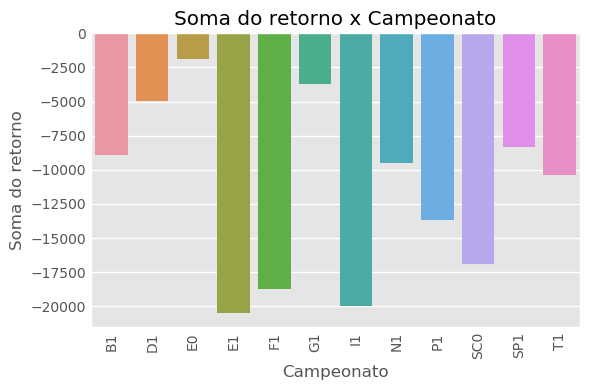

In [61]:
ax = sns.barplot(x = 'Div', y = 'retorno', data=league_sum)
plt.xticks(rotation=90) # se não rotacionar, os valores do eixo x (por isso xticks e não yticks) ficarão em 0 grau um por cima do outro
plt.title('Soma do retorno x Campeonato') # aqui no título e nos labels usei plt ou seja, matplotlib
plt.xlabel('Campeonato')                # mas antes usei o seaborn (1a linha), isso mostra que são
plt.ylabel('Soma do retorno')             # intercambiáveis
plt.tight_layout()

# dessa vez não vou salvar a imagem mas se quisesse era só usar o mesmo comando dos exemplos anteriores

# não precisou plt.show(). mas qualquer erro que der na hora de mostrar o gráfico, usa o plt.show()
#plt.show()